Iris数据集（鸢尾花卉数据集）很特别，早在1936年，Sir Ronald Fisher就第一次将它用于数据挖掘实验。因为这些数据是安德森通过直接测量鸢尾花卉花朵的各个部分得到的，所以为了纪念他，该数据集也被叫做安德森鸢尾花卉数据集。该数据集的数据采自是三种不同的鸢尾花卉（仙鸢尾、变色鸢尾和维吉尼亚鸢尾），确切来说，这些数据表示的是萼片和花瓣的长宽。

目前人们常用该数据集讲解多种分析方法，尤其是可以用机器学习方法解决分类问题。由此可见，scikit-learn库以150x4Numpy数组形式内置了该数据集也并非是偶然的。

数据中间四列分别代表花萼长度、花萼宽度、花瓣长度、花瓣宽度

In [1]:
import pandas as pd
df_Iris = pd.read_csv('Iris.csv')

In [2]:
# 前五行
df_Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 后五行
df_Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# 查看数据整体信息
df_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
# 得到信息：150行，6列，4个64位浮点数，1个64位整数，1个python对象，无缺失值
df_Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# include参数默认是只计算数值型特征的统计量，当输入include=['O']，会计算离散型变量的统计特征
# Referer:https://blog.csdn.net/xckkcxxck/article/details/84799220
# 官方文档:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df_Iris.describe(include=["O"]).T

,count,unique,top,freq
Species,150,3,Iris-versicolor,50


总数150, 3个种类, 最大频数为50, 也就是每种都为50个. 注意top里的指的不是Iris-versicolor最多, 是在频数相同的基础上按照字符串长度进行排名.

In [7]:
df_Iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
# 特征工程（数据清洗）
# 去掉Species特征中的'Iris-'前缀字符

#第一种方法: 替换
# df_Iris['Species']= df_Iris.Species.str.replace('Iris-','')
#第二种方法: 分割
# apply()方法将该列数据一个一个传递到函数中
#官方文档:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_Iris['Species']= df_Iris.Species.apply(lambda x: x.split('-')[1])
df_Iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

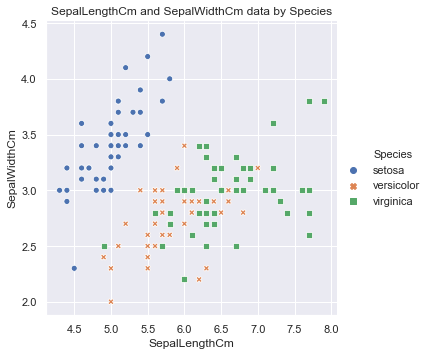

In [12]:
# 数据可视化，使用基于matplotlib，与pandas紧密结合的seaborn库
import seaborn as sns
import matplotlib.pyplot as plt
#sns初始化
sns.set()
# 设置散点图x轴与y轴以及data参数
# hue表示按照Species对数据进行分类, 而style表示每个类别的标签系列格式不一致.
sns.relplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species', data=df_Iris )
plt.title('SepalLengthCm and SepalWidthCm data by Species')
plt.show()